### <div id="libs">Import all libraries </div>

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify # pip install squarify (algorithm for treemap)
import os
import math
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

### <div id="dataset">Load Dataset</div>

In [2]:
# Load app store file
apps = pd.read_csv(r"C:\Users\SHREE\Downloads\Mentorships\Analyze Mobile App Data on various platforms and generate recommendations based on the analysis and various metrics available in the datasets using Python\AppleStore.csv")
apps.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [3]:
#Overview of dataset
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7197 non-null   int64  
 1   id                7197 non-null   int64  
 2   track_name        7197 non-null   object 
 3   size_bytes        7197 non-null   int64  
 4   currency          7197 non-null   object 
 5   price             7197 non-null   float64
 6   rating_count_tot  7197 non-null   int64  
 7   rating_count_ver  7197 non-null   int64  
 8   user_rating       7197 non-null   float64
 9   user_rating_ver   7197 non-null   float64
 10  ver               7197 non-null   object 
 11  cont_rating       7197 non-null   object 
 12  prime_genre       7197 non-null   object 
 13  sup_devices.num   7197 non-null   int64  
 14  ipadSc_urls.num   7197 non-null   int64  
 15  lang.num          7197 non-null   int64  
 16  vpp_lic           7197 non-null   int64  


### <div id="dataprep">Data Pre-Processing Steps</div>

####  <div id="missing"> --- Check Missing values --- </div>

This is almost the first step to check whether dataset has any null or empty value or not.

In [4]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

missing_data(apps)

,Total,Percent
Unnamed: 0,0,0.0
user_rating_ver,0,0.0
lang.num,0,0.0
ipadSc_urls.num,0,0.0
sup_devices.num,0,0.0
prime_genre,0,0.0
cont_rating,0,0.0
ver,0,0.0
user_rating,0,0.0
id,0,0.0


As we can see that there is no missing values in entire dataset

1. #### <div id="bytes"> --- Convert app size from Bytes to MB --- </div>

This step is  necessary as it become easy for further analysis

In [5]:
apps['size_bytes'] = apps['size_bytes'] / 1000000
apps.rename(columns={'size_bytes':'size_mb'}, inplace=True)
apps.head(5)

,Unnamed: 0,id,track_name,size_mb,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100.788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158.578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100.524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128.512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92.774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


#### <div id="dup">--- Remove Duplicates rows --- </div>

In [6]:
apps.duplicated(subset=None, keep=False)
apps.head(5)

,Unnamed: 0,id,track_name,size_mb,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100.788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158.578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100.524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128.512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92.774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


## <div id="insight"> Find Different Insights </div>


#### <div id="un_genres"> --- Find different kind of genres --- </div>


In [7]:
genres = apps['prime_genre'].unique()
print("Total genres : {}".format(len(genres)))
print(genres)

Total genres : 23
['Games' 'Productivity' 'Weather' 'Shopping' 'Reference' 'Finance' 'Music'
 'Utilities' 'Travel' 'Social Networking' 'Sports' 'Business'
 'Health & Fitness' 'Entertainment' 'Photo & Video' 'Navigation'
 'Education' 'Lifestyle' 'Food & Drink' 'News' 'Book' 'Medical' 'Catalogs']


#### <div id="total_free_paid"> --- Find Total free and paid apps --- </div>


Let's count total free apps and total paid apps in this dataset

In [8]:
freeapps = apps[apps.price == 0.0]
paidapps = apps[apps.price != 0.0]

print("Free apps : ",len(freeapps))
print("Paid apps : ",len(paidapps))

Free apps :  4056
Paid apps :  3141


Now, visualize on pie chart 

array([<AxesSubplot:ylabel='0'>], dtype=object)

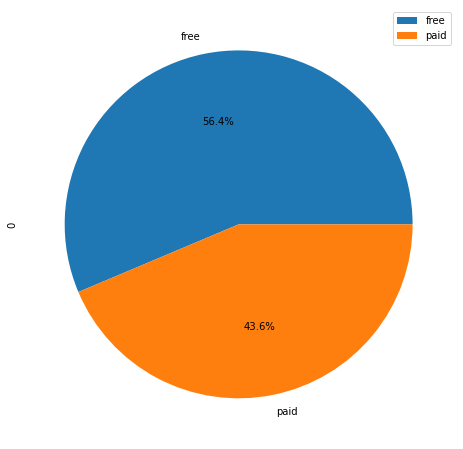

In [9]:
app_pricedf= pd.DataFrame( [len(freeapps),len(paidapps)] , index=['free','paid'])
app_pricedf.plot(kind='pie', subplots=True, figsize=(16,8), autopct='%1.1f%%')

 #### <div id="total_free_paid_genres"> --- Find Free and paid apps in all genres --- </div>


In [10]:
# Return the numbers of free app in each genres
def genreFree(gen):
    return len(apps[(apps['price'] == 0.0) & (apps['prime_genre']== gen)])

In [11]:
# Return the numbers of paid app in each genres
def genrePaid(gen):
    return len(apps[(apps['price'] != 0.0) & (apps['prime_genre']== gen)])

In [12]:
# Make list of each genre , its free app, paid app and total app . then merge it into one dataframe
genre_list = list()
genreFree_list = list()
genrePaid_list = list()
genreTotal_list = list()

In [13]:
# append all details in respective list
for gen in genres:  
    free_gen = genreFree(gen)
    paid_gen = genrePaid(gen)
    totalapp_gen = free_gen + paid_gen
    genre_list.append(gen)
    genreFree_list.append(free_gen)
    genrePaid_list.append(paid_gen)
    genreTotal_list.append(totalapp_gen)

In [14]:
# Let's make a dataframe of it
genre_df = pd.DataFrame({
    "genre_name" : genre_list,
    "genre_freeApp" : genreFree_list,
    "genre_paidApp" : genrePaid_list,
    "genre_totalApp" : genreTotal_list
},columns=['genre_name','genre_freeApp','genre_paidApp','genre_totalApp'])

#sorting into descending order
genre_df.sort_values('genre_totalApp', ascending=False, inplace=True)

genre_df.head(10)

,genre_name,genre_freeApp,genre_paidApp,genre_totalApp
0,Games,2257,1605,3862
13,Entertainment,334,201,535
16,Education,132,321,453
14,Photo & Video,167,182,349
7,Utilities,109,139,248
12,Health & Fitness,76,104,180
1,Productivity,62,116,178
9,Social Networking,143,24,167
17,Lifestyle,94,50,144
6,Music,67,71,138


In [15]:
# remove duplicate genre 
genre_df.drop_duplicates('genre_name',keep= False,inplace=True)
genre_df.head()

,genre_name,genre_freeApp,genre_paidApp,genre_totalApp
0,Games,2257,1605,3862
13,Entertainment,334,201,535
16,Education,132,321,453
14,Photo & Video,167,182,349
7,Utilities,109,139,248


In [16]:
def groupedGraph(start,end):
    # set width of bar
    barWidth = 0.20

    # set height of bar
    bars1 = genre_df['genre_freeApp'][start:end]
    bars2 = genre_df['genre_paidApp'][start:end]
    bars3 = genre_df['genre_totalApp'][start:end]

    # Set position of bar on X axis
    r1 = np.arange(bars1.size)
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]

    # Make the plot
    plt.bar(r1, bars1, color='#36688D', width=barWidth, edgecolor='white', label='Free apps')
    plt.bar(r2, bars2, color='#F3CD05', width=barWidth, edgecolor='white', label='Paid apps')
    plt.bar(r3, bars3, color='#F49F05', width=barWidth, edgecolor='white', label='Total apps')

    # Add xticks on the middle of the group bars
    plt.xticks([r + barWidth for r in range(len(bars1))], genre_df['genre_name'][start:end])

    # Create legend & Show graphic
    plt.legend()


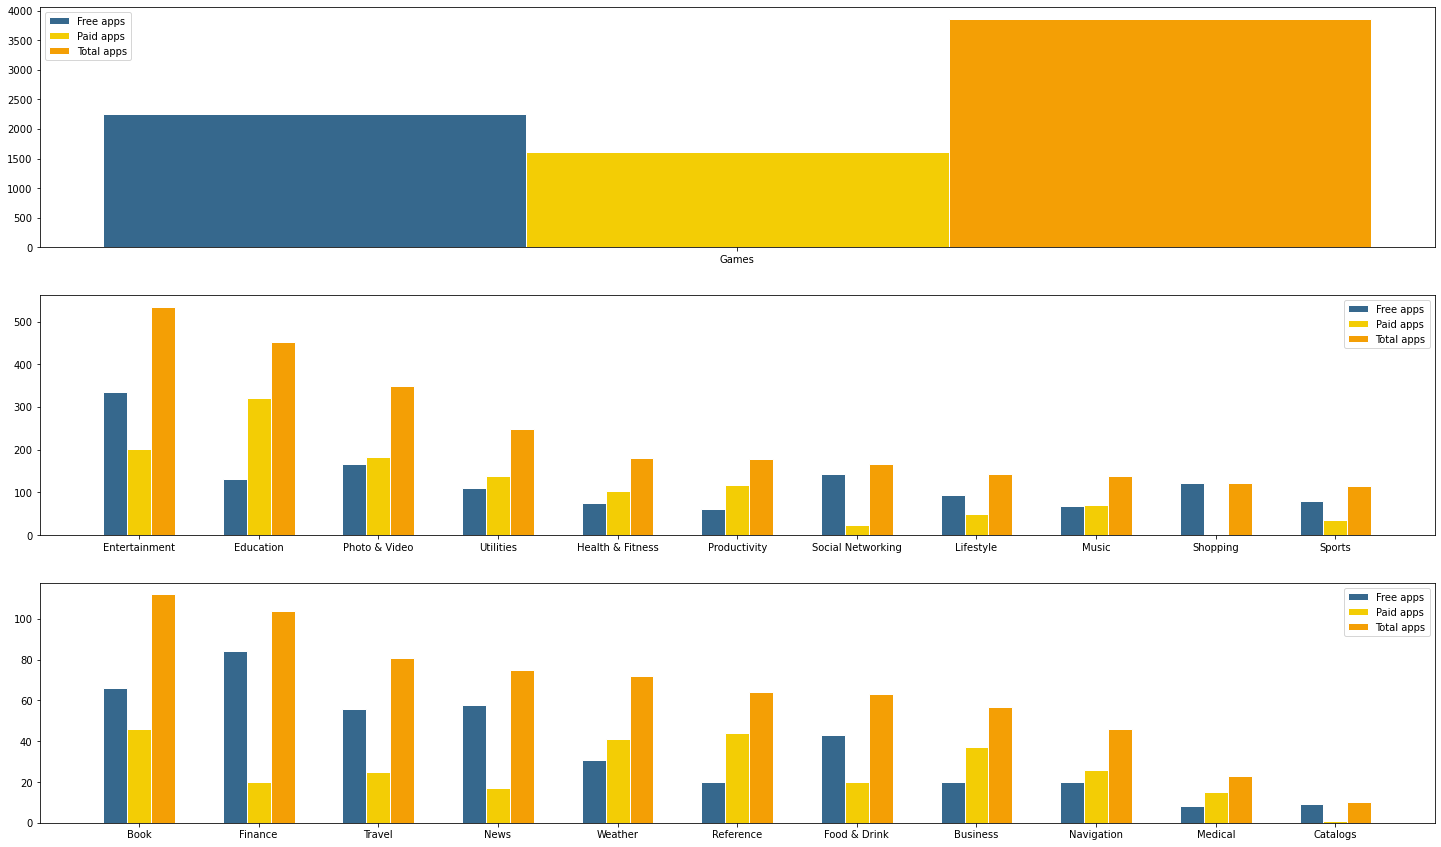

In [17]:
#Let's visualize this dataframe into the Grouped barplot

fig = plt.figure(figsize=(25,15))

plt.subplot(311)
groupedGraph(0,1)

plt.subplot(312)
groupedGraph(1,12)

plt.subplot(313)
groupedGraph(12,23)



#### <div id="popular_app_genres"> --- Find Most Popluar apps in all Genres --- </div>


Here, I have sorted user_rating and rating_count_tot fields in a descending order to get highest rating apps for all versions in order to find most popular apps

In [18]:
popular_apps = apps.sort_values(['user_rating','rating_count_tot'], ascending=False)
popular_apps.head()

,Unnamed: 0,id,track_name,size_mb,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
1104,1289,487119327,Head Soccer,121.319424,USD,0.00,481564,8518,5.0,5.0,5.4.1,4+,Games,40,4,11,1
302,341,350642635,Plants vs. Zombies,105.379840,USD,0.99,426463,680,5.0,4.0,1.9.13,9+,Games,38,0,5,1
3086,3694,930574573,Sniper 3D Assassin: Shoot to Kill Gun Game,157.851648,USD,0.00,386521,10332,5.0,5.0,1.17.6,17+,Games,40,5,9,1
2177,2537,698255242,Geometry Dash Lite,69.076992,USD,0.00,370370,2650,5.0,4.5,2.11,4+,Games,37,4,1,1
498,568,387428400,Infinity Blade,624.107810,USD,0.99,326482,177050,5.0,5.0,1.4.1,12+,Games,43,5,13,1


[Text(0, 0, 'Head Soccer'),
 Text(1, 0, 'Plants vs. Zombies'),
 Text(2, 0, 'Sniper 3D Assassin: Shoot to Kill Gun Game'),
 Text(3, 0, 'Geometry Dash Lite'),
 Text(4, 0, 'Infinity Blade'),
 Text(5, 0, 'Geometry Dash'),
 Text(6, 0, "Domino's Pizza USA"),
 Text(7, 0, 'CSR Racing 2'),
 Text(8, 0, "Pictoword: Fun 2 Pics Guess What's the Word Trivia"),
 Text(9, 0, 'Plants vs. Zombies HD'),
 Text(10, 0, 'The Room'),
 Text(11, 0, 'Iron Force'),
 Text(12, 0, 'Sniper Shooter: Gun Shooting Games'),
 Text(13, 0, 'Flashlight Ⓞ'),
 Text(14, 0, 'Pic Collage - Picture Editor & Photo Collage Maker'),
 Text(15, 0, 'Zappos: shop shoes & clothes, fast free shipping'),
 Text(16, 0, 'Credit Karma: Free Credit Scores, Reports & Alerts'),
 Text(17, 0, "PewDiePie's Tuber Simulator"),
 Text(18, 0, 'We Heart It - Fashion, wallpapers, quotes, tattoos'),
 Text(19, 0, 'Google Photos - unlimited photo and video storage')]

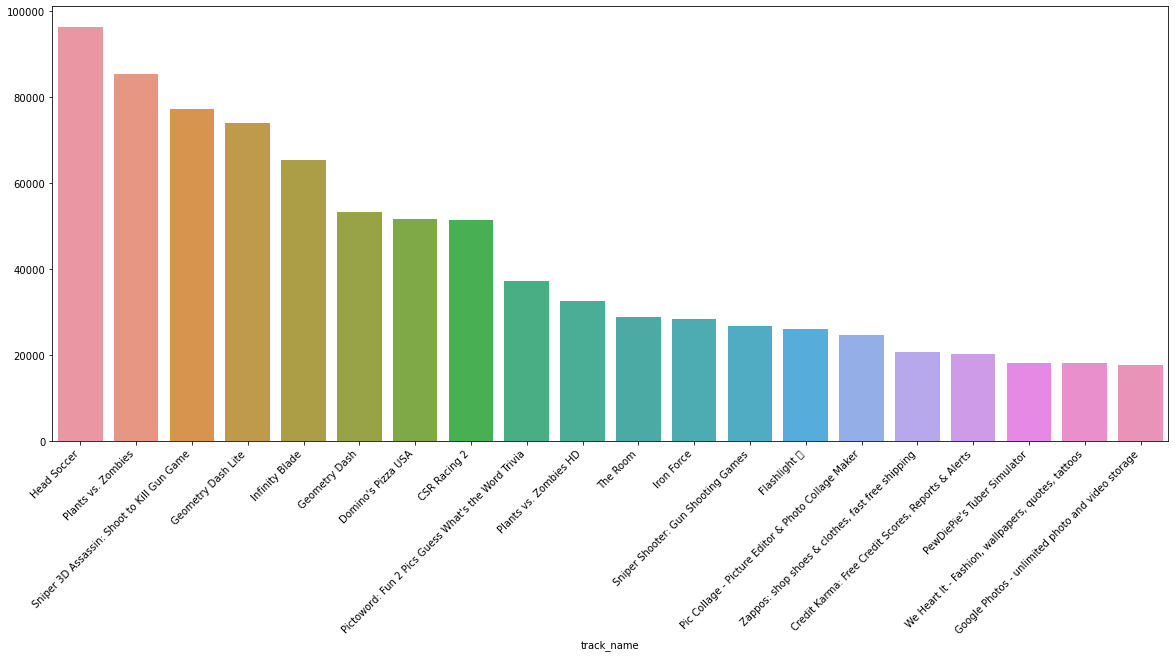

In [19]:
#Let's visualize top 10 higher rating applications in bar plot

fig = plt.figure(figsize=(20,8))

ax = sns.barplot(popular_apps['track_name'][0:20], (popular_apps['rating_count_tot']/popular_apps['user_rating'])[0:20])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

#### <div id="total_free_paid_popularapp"> --- Find Total Free and Paid apps in the list of popular apps (rating 4 to 5) --- </div>

Let's segregate apps from rating 4 to 5 only

In [20]:
# All higher rating applications 
ratingapp = popular_apps[(popular_apps['user_rating'] == 4.0) | (popular_apps['user_rating'] == 5.0) | (popular_apps['user_rating']==4.5)]
ratingapp.head(5)

,Unnamed: 0,id,track_name,size_mb,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
1104,1289,487119327,Head Soccer,121.319424,USD,0.00,481564,8518,5.0,5.0,5.4.1,4+,Games,40,4,11,1
302,341,350642635,Plants vs. Zombies,105.379840,USD,0.99,426463,680,5.0,4.0,1.9.13,9+,Games,38,0,5,1
3086,3694,930574573,Sniper 3D Assassin: Shoot to Kill Gun Game,157.851648,USD,0.00,386521,10332,5.0,5.0,1.17.6,17+,Games,40,5,9,1
2177,2537,698255242,Geometry Dash Lite,69.076992,USD,0.00,370370,2650,5.0,4.5,2.11,4+,Games,37,4,1,1
498,568,387428400,Infinity Blade,624.107810,USD,0.99,326482,177050,5.0,5.0,1.4.1,12+,Games,43,5,13,1


Divide ratingapp dataframe into free_ratingapp and paid_ratingapp

In [21]:
#Only free higher rating applications
free_ratingapp = ratingapp[ratingapp['price'] == 0.0]

#Only paid higher rating applications
paid_ratingapp = ratingapp[ratingapp['price'] != 0.0]

print("All higher rating applications :", len(ratingapp))
print("Free higher rating applications : ",len(free_ratingapp))
print("Paid higher rating applications : ",len(paid_ratingapp))

All higher rating applications : 4781
Free higher rating applications :  2570
Paid higher rating applications :  2211


[Text(0, 0, 'Plants vs. Zombies---Games'),
 Text(1, 0, 'Infinity Blade---Games'),
 Text(2, 0, 'Geometry Dash---Games'),
 Text(3, 0, 'Plants vs. Zombies HD---Games'),
 Text(4, 0, 'The Room---Games'),
 Text(5, 0, 'HB2 PLUS---Games'),
 Text(6, 0, 'Ski Safari---Games'),
 Text(7, 0, 'The Room Two---Games'),
 Text(8, 0, 'Yoga Studio---Health & Fitness')]

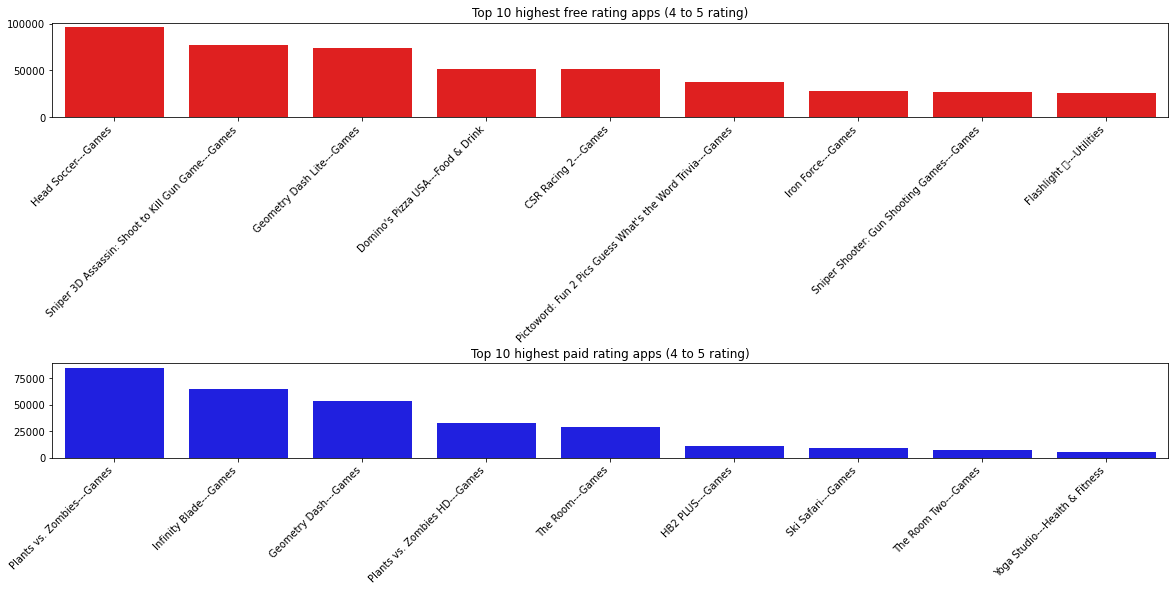

In [22]:
#let's visualize popular free and paid rating apps (4 to 5 rating)
fig = plt.figure(figsize=(20,8))

plt.subplot(411)
plt.title("Top 10 highest free rating apps (4 to 5 rating)")
ax = sns.barplot(free_ratingapp['track_name'][0:9] + '---' + free_ratingapp['prime_genre'][0:9],(free_ratingapp['rating_count_tot']/free_ratingapp['user_rating'])[0:9], color="red")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

plt.subplot(414)
plt.title("Top 10 highest paid rating apps (4 to 5 rating)")
ax = sns.barplot(paid_ratingapp['track_name'][0:9] + '---' + paid_ratingapp['prime_genre'][0:9],(paid_ratingapp['rating_count_tot']/paid_ratingapp['user_rating'])[0:9], color="blue")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

#### <div id="popular_genres_both"> --- Find Most Popluar Genres in Free apps and Paid apps --- </div>


In [23]:
# create the empty lists for storing total highratingapps in their respective genres
free_highratingapp = list()
paid_highratingapp = list()
total_highratingapp = list()

In [24]:
# appending free and paid popular apps for each genres
for g in ratingapp['prime_genre'].unique():
    free_highratingapp.append(len(free_ratingapp[free_ratingapp['prime_genre']== g]))
    paid_highratingapp.append(len(paid_ratingapp[paid_ratingapp['prime_genre']== g]))
    total_highratingapp.append(len(free_ratingapp[free_ratingapp['prime_genre']== g]) + len(paid_ratingapp[paid_ratingapp['prime_genre']== g]))
    

In [25]:
# Make dataframe of total free and paid apps genreswise
rating_df = pd.DataFrame({
    'genre' : genre_list,
    'free_higherRating' : free_highratingapp,
    'paid_higherRating' : paid_highratingapp,
    'total_higherRating' : total_highratingapp
},columns=['genre','free_higherRating','paid_higherRating','total_higherRating'])

rating_df.sort_values('total_higherRating',ascending =False, inplace=True)
rating_df.head()

,genre,free_higherRating,paid_higherRating,total_higherRating
0,Games,1625,1243,2868
8,Travel,76,189,265
13,Entertainment,154,107,261
3,Shopping,122,133,255
15,Navigation,53,91,144


In [26]:
#remove duplicates if any
rating_df.drop_duplicates('genre',keep=False,inplace=True)
rating_df.head()

,genre,free_higherRating,paid_higherRating,total_higherRating
0,Games,1625,1243,2868
8,Travel,76,189,265
13,Entertainment,154,107,261
3,Shopping,122,133,255
15,Navigation,53,91,144


Here, visualize it in circle graph

Text(0.5, 1.0, 'Top 10 Paid popular applications genres')

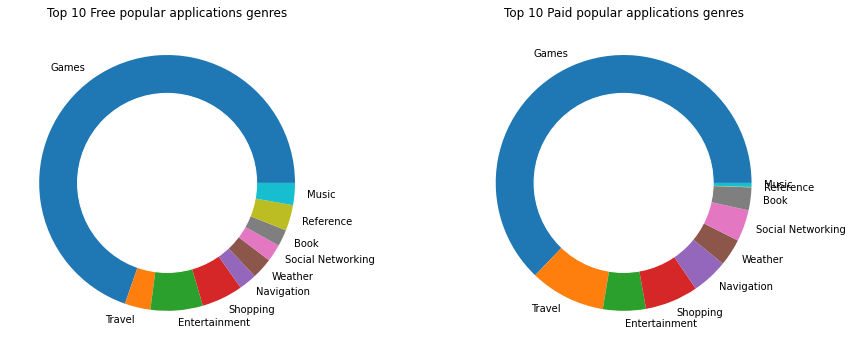

In [27]:
fig = plt.figure(figsize=(15,20))

plt.subplot(321)
# Create a circle for the center of the plot
circle=plt.Circle( (0,0), 0.7, color='white')

plt.pie(rating_df['free_higherRating'][0:10], labels= rating_df['genre'][0:10])
p=plt.gcf()
p.gca().add_artist(circle)
plt.title("Top 10 Free popular applications genres")

plt.subplot(322)
# Create a circle for the center of the plot
circle=plt.Circle( (0,0), 0.7, color='white')

plt.pie(rating_df['paid_higherRating'][0:10], labels= rating_df['genre'][0:10])
p=plt.gcf()
p.gca().add_artist(circle)
plt.title("Top 10 Paid popular applications genres")



#### <div id="popular_app_rating"> --- Find Most High rating apps in all Genres --- </div>


In [28]:
def dountChart(gen,title):  
    # Create a circle for the center of the plot
    circle=plt.Circle( (0,0), 0.7, color='white')
    
    # just keep on user rating as name not overlapping while pie chart plotting
    plt.pie(ratingapp['user_rating'][ratingapp['prime_genre']==gen][0:10], labels= ratingapp['track_name'][ratingapp['prime_genre']==gen][0:10])
    p=plt.gcf() #gcf = get current figure
    p.gca().add_artist(circle)
    plt.title(title , fontname="arial black")

findfont: Font family ['arial black'] not found. Falling back to DejaVu Sans.


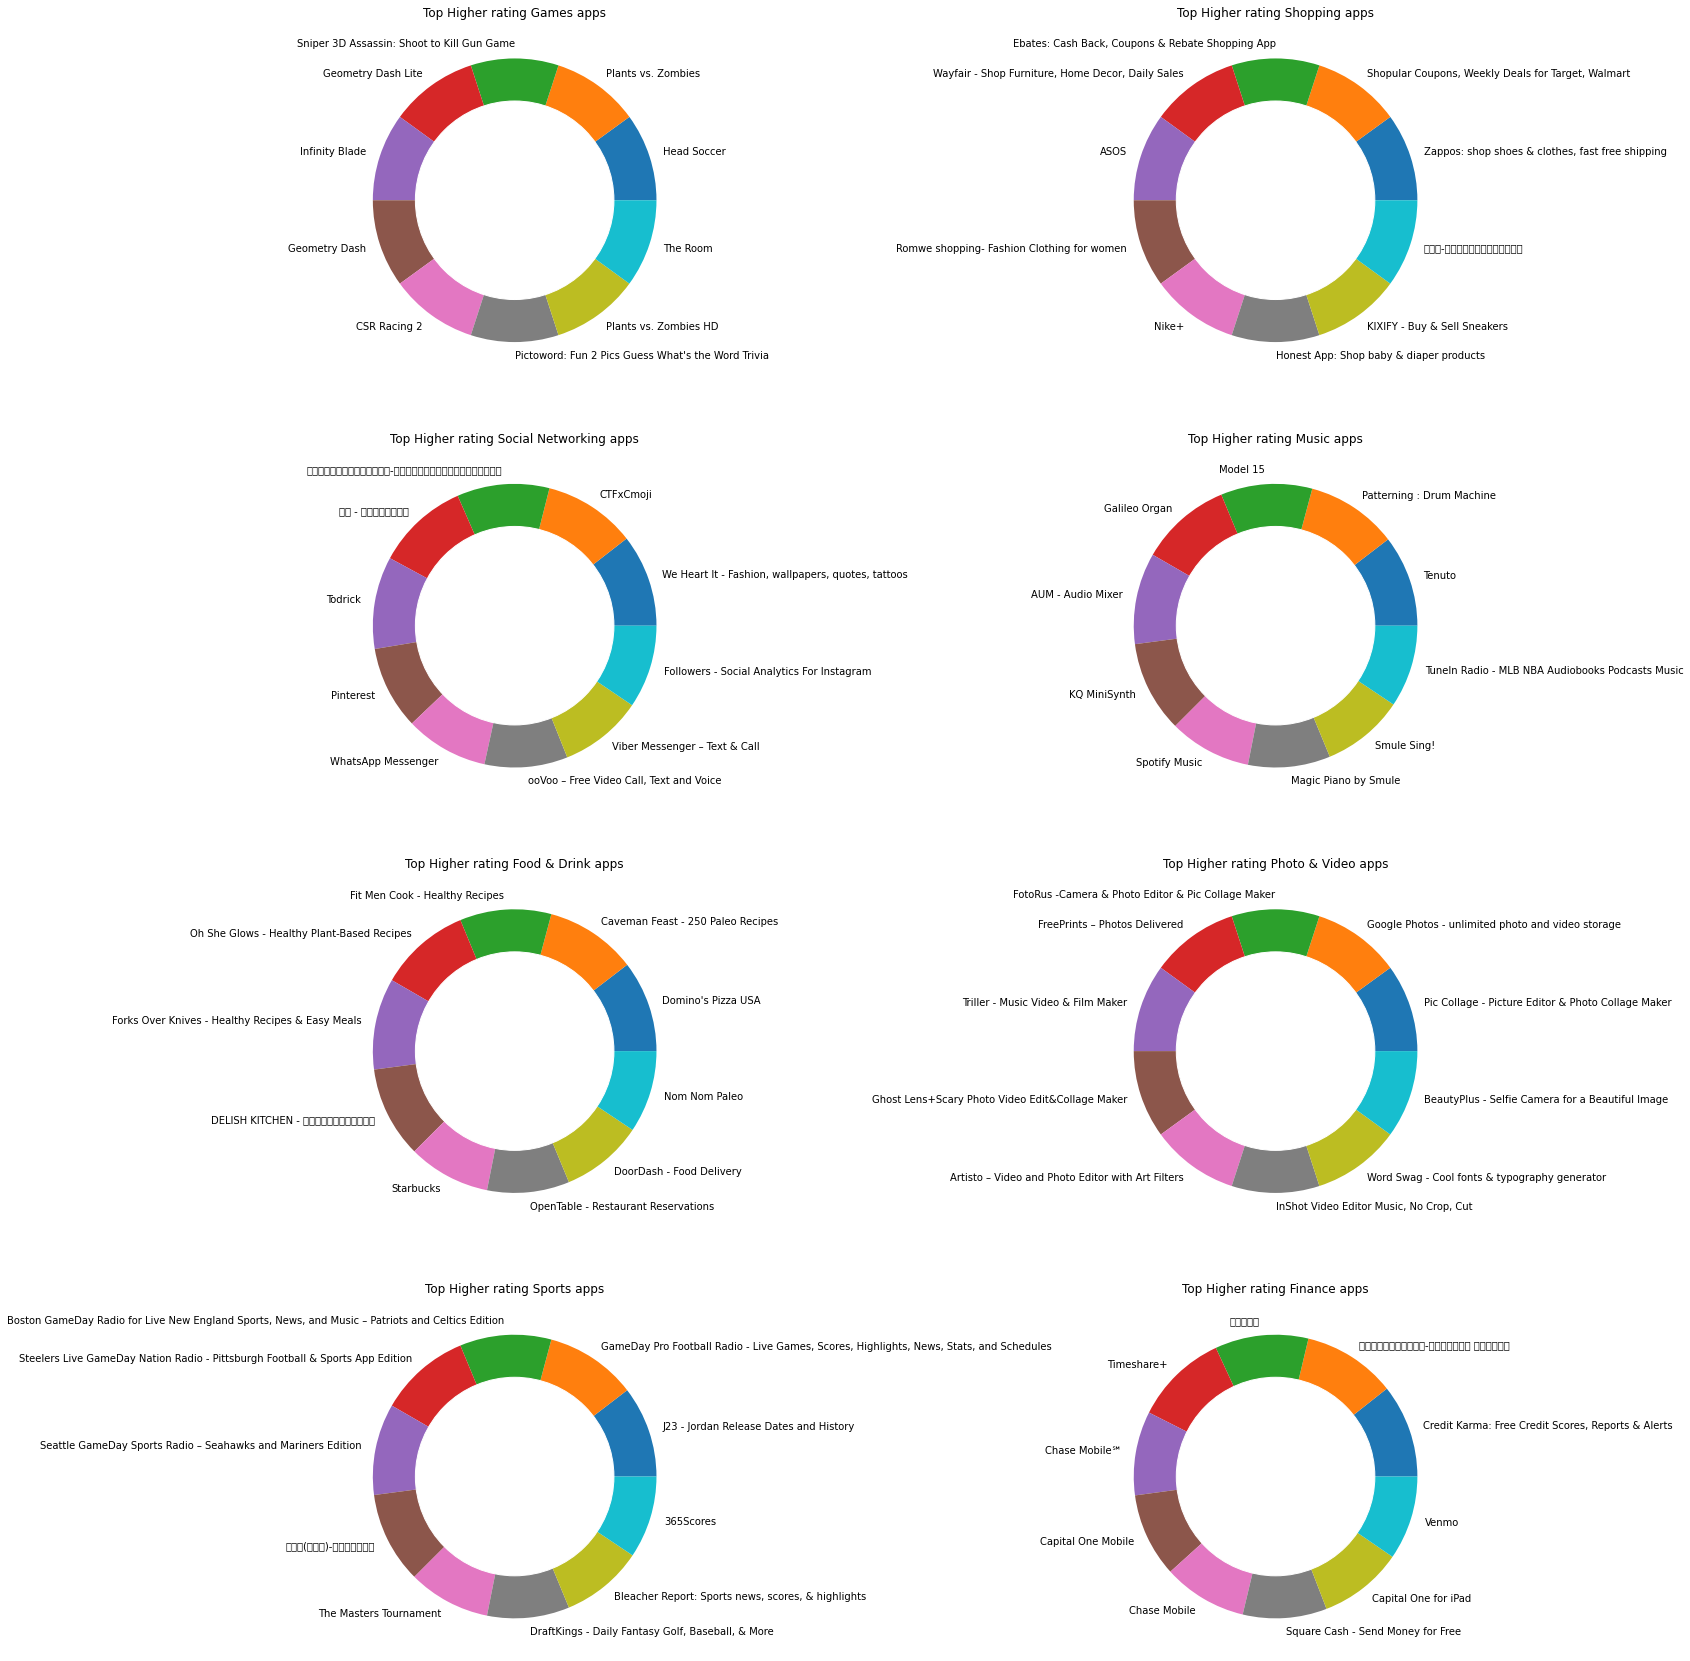

In [29]:
gens = ['Games','Shopping','Social Networking','Music','Food & Drink', 'Photo & Video','Sports','Finance']

fig = plt.figure(figsize=(25,30))

plt.subplot(421)
dountChart(gens[0],'Top Higher rating '+gens[0]+' apps')  

plt.subplot(422)
dountChart(gens[1],'Top Higher rating '+gens[1]+' apps')

plt.subplot(423)
dountChart(gens[2],'Top Higher rating '+gens[2]+' apps')

plt.subplot(424)
dountChart(gens[3],'Top Higher rating '+gens[3]+' apps')

plt.subplot(425)
dountChart(gens[4],'Top Higher rating '+gens[4]+' apps')

plt.subplot(426)
dountChart(gens[5],'Top Higher rating '+gens[5]+' apps')

plt.subplot(427)
dountChart(gens[6],'Top Higher rating '+gens[6]+' apps')

plt.subplot(428)
dountChart(gens[7],'Top Higher rating '+gens[7]+' apps')

#### <div id="popular_free_app_rating"> --- Find Most High rating Free apps in all Genres --- </div>


In [30]:
def squatifyChart(gen,title):
    squarify.plot(free_ratingapp['user_rating'][free_ratingapp['prime_genre']==gen][0:5], 
              label=free_ratingapp['track_name'][free_ratingapp['prime_genre']==gen][0:5],
              alpha=.5,
             norm_x=50)
    plt.title(title)
    plt.axis('off')

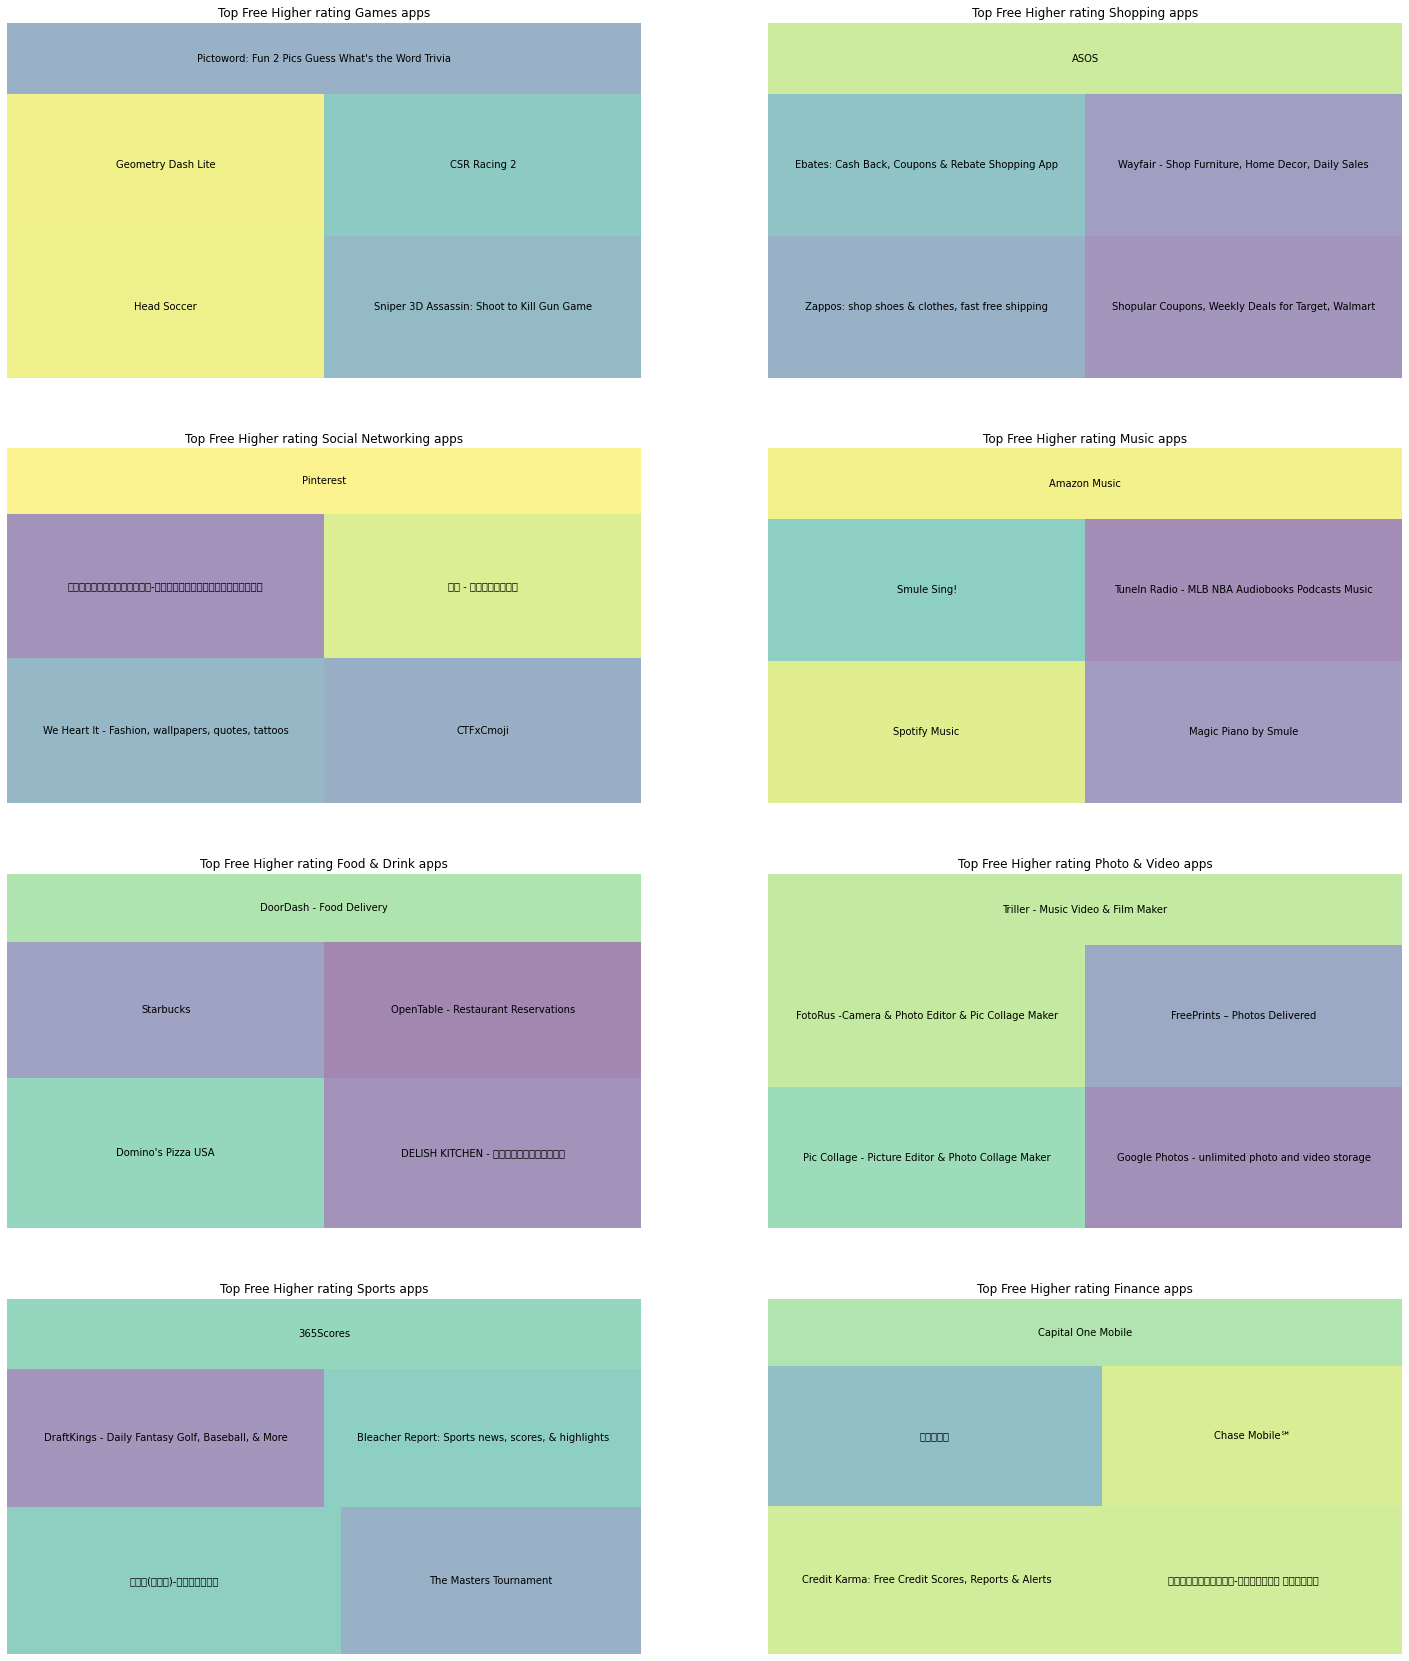

In [31]:
gens = ['Games','Shopping','Social Networking','Music','Food & Drink', 'Photo & Video','Sports','Finance']

fig = plt.figure(figsize=(25,30))

plt.subplot(421)
squatifyChart(gens[0],'Top Free Higher rating '+gens[0]+' apps')  

plt.subplot(422)
squatifyChart(gens[1],'Top Free Higher rating '+gens[1]+' apps')

plt.subplot(423)
squatifyChart(gens[2],'Top Free Higher rating '+gens[2]+' apps')

plt.subplot(424)
squatifyChart(gens[3],'Top Free Higher rating '+gens[3]+' apps')

plt.subplot(425)
squatifyChart(gens[4],'Top Free Higher rating '+gens[4]+' apps')

plt.subplot(426)
squatifyChart(gens[5],'Top Free Higher rating '+gens[5]+' apps')

plt.subplot(427)
squatifyChart(gens[6],'Top Free Higher rating '+gens[6]+' apps')

plt.subplot(428)
squatifyChart(gens[7],'Top Free Higher rating '+gens[7]+' apps')

#### <div id="popular_paid_app_rating"> --- Find Most High rating Paid apps in all Genres --- </div>



In [32]:
def squatifyChart_paid(gen,title):
    squarify.plot(paid_ratingapp['user_rating'][paid_ratingapp['prime_genre']==gen][0:5], 
              label=paid_ratingapp['track_name'][paid_ratingapp['prime_genre']==gen][0:5],
              alpha=.5,
              color=["pink","green","blue", "grey"],
             norm_x=50)
    plt.title(title)
    plt.axis('off')

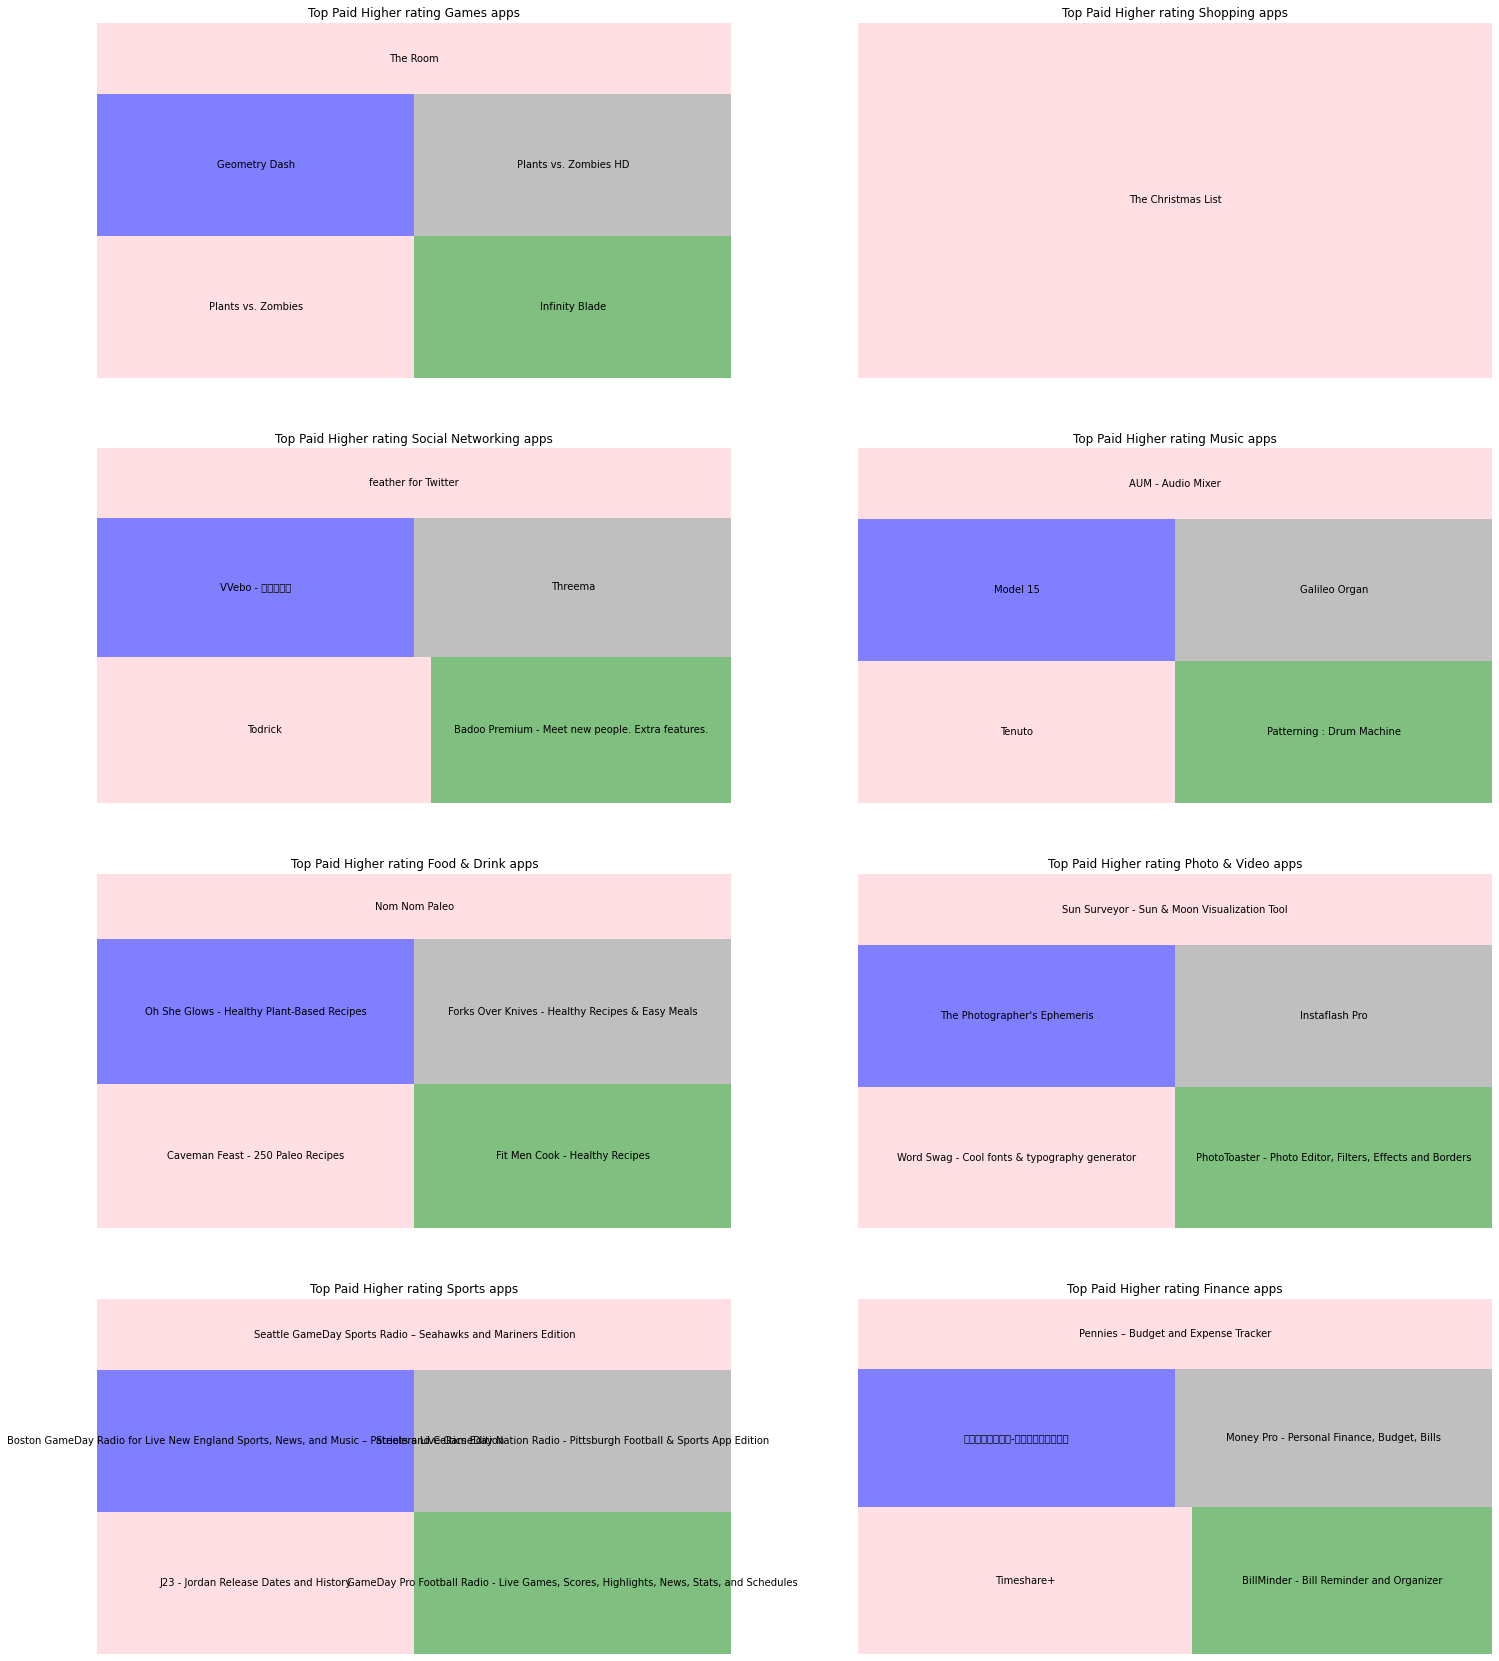

In [33]:
gens = ['Games','Shopping','Social Networking','Music','Food & Drink', 'Photo & Video','Sports','Finance']

fig = plt.figure(figsize=(25,30))

plt.subplot(421)
squatifyChart_paid(gens[0],'Top Paid Higher rating '+gens[0]+' apps')  

plt.subplot(422)
squatifyChart_paid(gens[1],'Top Paid Higher rating '+gens[1]+' apps')

plt.subplot(423)
squatifyChart_paid(gens[2],'Top Paid Higher rating '+gens[2]+' apps')

plt.subplot(424)
squatifyChart_paid(gens[3],'Top Paid Higher rating '+gens[3]+' apps')

plt.subplot(425)
squatifyChart_paid(gens[4],'Top Paid Higher rating '+gens[4]+' apps')

plt.subplot(426)
squatifyChart_paid(gens[5],'Top Paid Higher rating '+gens[5]+' apps')

plt.subplot(427)
squatifyChart_paid(gens[6],'Top Paid Higher rating '+gens[6]+' apps')

plt.subplot(428)
squatifyChart_paid(gens[7],'Top Paid Higher rating '+gens[7]+' apps')

#### <div id="sup_device"> --- Find Most Supported devices apps --- </div>

In [34]:
apps.sort_values(["sup_devices.num","user_rating"],ascending=False).head()

,Unnamed: 0,id,track_name,size_mb,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
605,691,403090531,Dungeon Raid,11.911065,USD,0.99,4401,2927,5.0,5.0,1.3.4,9+,Games,47,0,1,0
613,699,404553553,Bloons TD 4,23.447492,USD,2.99,8304,1401,4.5,4.5,3.6.1,4+,Games,47,0,1,1
768,877,430920838,Tikal,27.049083,USD,2.99,626,435,4.5,4.5,1.2,4+,Games,47,5,1,1
1003,1159,471458190,Reiner Knizia's Tigris & Euphrates,54.852324,USD,4.99,1777,321,4.5,4.5,2.0.1,4+,Games,47,5,1,1
1012,1176,473596157,Haunted Halloween Escape,15.481361,USD,0.00,11945,11863,4.5,4.5,1.1,12+,Games,47,5,0,1


#### <div id="total_sup_device"> --- Find Total apps in Most Supported devices ---</div>


In [35]:
sup_devices_apps = pd.DataFrame({
    'number_of_devices' :apps["sup_devices.num"].value_counts().index,
    'total_number_of_apps' : apps["sup_devices.num"].value_counts()
},columns=['number_of_devices','total_number_of_apps'])

sup_devices_apps.head()

,number_of_devices,total_number_of_apps
37,37,3263
38,38,1912
40,40,1142
43,43,371
24,24,270


#### <div id="total_sup_device_genres"> --- Find Total apps in Most Supported devices genrewise ---</div>


In [36]:
def sup_device_genre(genre):
    genre_apps = apps.groupby("prime_genre").get_group(genre)
    return pd.DataFrame({
              genre : genre_apps["sup_devices.num"].value_counts(),
                },columns=[genre])

In [37]:
for g in genres:
    sup_devices_apps[g] = sup_device_genre(g)
  
    
sup_devices_apps.fillna(0, inplace=True)
sup_devices_apps.sort_values('number_of_devices', ascending= False, inplace=True)
sup_devices_apps.head()

,number_of_devices,total_number_of_apps,Games,Productivity,Weather,Shopping,Reference,Finance,Music,Utilities,...,Entertainment,Photo & Video,Navigation,Education,Lifestyle,Food & Drink,News,Book,Medical,Catalogs
47,47,26,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
45,45,8,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43,43,371,298.0,3.0,2.0,0.0,1.0,2.0,5.0,2.0,...,20.0,6.0,0.0,15.0,3.0,0.0,0.0,1.0,1.0,0.0
40,40,1142,910.0,4.0,5.0,1.0,5.0,4.0,2.0,16.0,...,43.0,17.0,2.0,88.0,4.0,3.0,2.0,13.0,1.0,0.0
39,39,40,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,6.0,0.0,0.0,0.0,1.0,0.0,0.0


#### <div id="total_sup_device_free"> --- Find Total Free apps in Most Supported devices ---</div>


In [38]:
sup_devices_free_apps = pd.DataFrame({
    'number_of_devices' :freeapps["sup_devices.num"].value_counts().index,
    'total_number_of_free_apps' : freeapps["sup_devices.num"].value_counts()
},columns=['number_of_devices','total_number_of_free_apps'])

sup_devices_free_apps.head()

,number_of_devices,total_number_of_free_apps
37,37,1976
38,38,1201
40,40,634
24,24,96
43,43,80


#### <div id="total_sup_device_paid"> --- Find Total Paid apps in Most Supported devices ---</div>


In [39]:
sup_devices_paid_apps = pd.DataFrame({
    'number_of_devices' : paidapps["sup_devices.num"].value_counts().index,
    'total_number_of_paid_apps' : paidapps["sup_devices.num"].value_counts()
},columns=['number_of_devices','total_number_of_paid_apps'])

sup_devices_paid_apps.head()

,number_of_devices,total_number_of_paid_apps
37,37,1287
38,38,711
40,40,508
43,43,291
24,24,174


### <div id="pearson"> Pearson Correlation  </div>

Remove columns that are not much useful but how will you decide whether it is important for you or not.<br>
well, there are many ways : <br>
1. It depends on what is your purpose for making model.
2. various correlation techniques such a pearson correction.

For now I am deleting currency and version fields as I feel that it is not much useful

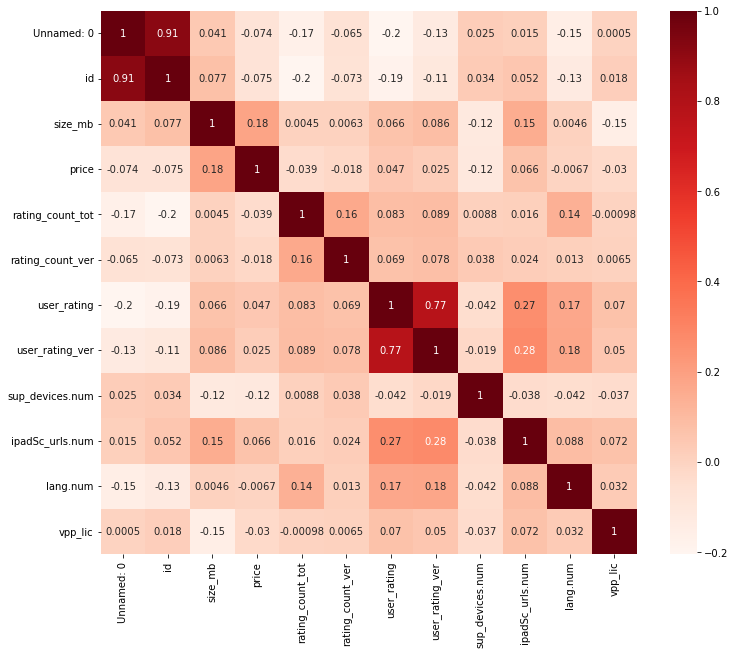

In [40]:
plt.figure(figsize=(12,10))
cor = apps.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

- A value closer to 0 implies a weaker correlation (exact 0 implying no correlation)
- A value closer to 1 implies a stronger positive correlation
- A value closer to -1 implies a stronger negative correlation

In [41]:
new_apps = apps

del new_apps['currency']
del new_apps['ver']

new_apps.head()

,Unnamed: 0,id,track_name,size_mb,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100.788224,3.99,21292,26,4.0,4.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158.578688,0.00,161065,26,4.0,3.5,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100.524032,0.00,188583,2822,3.5,4.5,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128.512000,0.00,262241,649,4.0,4.5,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92.774400,0.00,985920,5320,4.5,5.0,4+,Reference,37,5,45,1


 ### <div id="feature_engineer"> Feature engineering </div>

Let's Create a new features 

In [42]:
new_apps['total_users_rating'] = new_apps['rating_count_tot'] / new_apps['user_rating']
new_apps['total_users_rating_cur'] = new_apps['rating_count_ver'] / new_apps['user_rating_ver']

del new_apps['rating_count_tot']
del new_apps['user_rating']
del new_apps['rating_count_ver']
del new_apps['user_rating_ver']

new_apps['total_users_rating'].fillna(0, inplace=True)
new_apps['total_users_rating_cur'].fillna(0, inplace=True)

new_apps['total_users_rating'] = new_apps['total_users_rating'].apply(lambda x : math.ceil(x))
new_apps['total_users_rating_cur'] = new_apps['total_users_rating_cur'].apply(lambda x : math.ceil(x))
new_apps.head()

,Unnamed: 0,id,track_name,size_mb,price,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,total_users_rating,total_users_rating_cur
0,1,281656475,PAC-MAN Premium,100.788224,3.99,4+,Games,38,5,10,1,5323,6
1,2,281796108,Evernote - stay organized,158.578688,0.00,4+,Productivity,37,5,23,1,40267,8
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100.524032,0.00,4+,Weather,37,5,3,1,53881,628
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128.512000,0.00,12+,Shopping,37,5,9,1,65561,145
4,5,282935706,Bible,92.774400,0.00,4+,Reference,37,5,45,1,219094,1064


Check whether any error in support language field...

In [43]:
len(new_apps[new_apps['lang.num'] == 0])

41

Here, this is an error as it is not possible that game has 0 language <br>
So, Let's replace 0 to 1 

In [44]:
new_apps['lang.num'].replace(0,1, inplace= True)
len(new_apps[new_apps['lang.num'] == 0])

0

 <div id="games">Total number of Games that are available in a multiple languages</div>

In [45]:
print("Total number of apps that are available in a multiple languages : {} ".format(len(new_apps[new_apps['lang.num'] > 1])))
print("Number of apps that are available in only one language languages : {} ".format(len(new_apps[new_apps['lang.num'] == 1])))
print("Number of apps that are available in the range of 5 to 20 languages : {} ".format(len(new_apps[(new_apps['lang.num'] >= 5) & (new_apps['lang.num'] <= 20)])))
print("Number of apps that are available in the range of 20 to 50 languages : {} ".format(len(new_apps[(new_apps['lang.num'] >= 20) & (new_apps['lang.num'] <= 50)])))
print("Number of apps that are available in more than 50 languages : {} ".format(len(new_apps[new_apps['lang.num'] >= 50])))


Total number of apps that are available in a multiple languages : 3389 
Number of apps that are available in only one language languages : 3808 
Number of apps that are available in the range of 5 to 20 languages : 1966 
Number of apps that are available in the range of 20 to 50 languages : 373 
Number of apps that are available in more than 50 languages : 26 


 <div id="maxlangapp">Maximum languges support application</div>

In [46]:
print("Maximum languges support application : ")
new_apps[['track_name','lang.num','prime_genre']][new_apps['lang.num'] == max(new_apps['lang.num'])]

Maximum languges support application : 


,track_name,lang.num,prime_genre
3414,Google Photos - unlimited photo and video storage,75,Photo & Video
